In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.get_dataset_names()

C:\Users\G V Swetha\anaconda3\lib\site-packages\seaborn\utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\Users\G V Swetha\anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#Print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
titanic.drop(columns=['who','adult_male','embark_town','alone','alive','class','deck'],inplace=True)

In [5]:
titanic['embarked']= titanic['embarked'].fillna(titanic['embarked'].mode()[0])

In [6]:
titanic['age']=titanic['age'].fillna(titanic['age'].median())
titanic_treated = titanic.fillna({'age':999,'embarked':'Missing'})

In [7]:
for x in titanic_treated.columns:
    if titanic_treated[x].dtype == "object":
        titanic_treated[x]=pd.Categorical(titanic_treated[x]).codes
        

In [8]:
titanic_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int8   
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 43.6 KB


In [9]:
titanic_treated.groupby('survived').size()

survived
0    549
1    342
dtype: int64

In [10]:
x=titanic_treated.drop(['survived'],axis=1)
y=titanic_treated['survived']

from sklearn.model_selection import train_test_split
#Create train and test data with 75% and 25% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=0)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)


(712, 7)
(179, 7)
(712,)
(179,)


In [11]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(class_weight='balanced')
clf

clf.fit(train_x,train_y)

DecisionTreeClassifier(class_weight='balanced')

DecisionTreeClassifier(class_weight='balanced')

In [12]:
dtree_predicted=clf.predict(test_x)

In [13]:
# Model evaluation
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
print("Accuracy Score")
print(metrics.accuracy_score(test_y,dtree_predicted))
print("Precision/Recall Matrix")
print(metrics.classification_report(test_y,dtree_predicted))
print("AUC")
auc=metrics.roc_auc_score(test_y,dtree_predicted)
auc

Accuracy Score
0.7932960893854749
Precision/Recall Matrix
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       110
           1       0.74      0.72      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

AUC


0.7805006587615284

Confusion Matrix


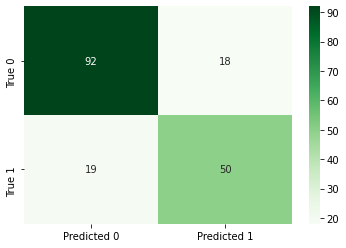

In [14]:
import matplotlib.pyplot as plt
#Confusion matrix for Decision Trees
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,dtree_predicted)
lbl1=["Predicted 0", "Predicted 1"]
lbl2=["True 0", "True 1"]
sns.heatmap(cf,annot=True,cmap='Greens',fmt='d',xticklabels=lbl1,yticklabels=lbl2)
plt.show();

In [15]:
clf

DecisionTreeClassifier(class_weight='balanced')

In [16]:
my_max_depth =[5,10,15,20,50]
my_criterion = ['gini','entropy']
my_min_samples_leaf = [2,5,10,15,20,25]
my_min_samples_split = [2,5,10,15,50,100]

In [17]:
#number of models 
len(my_max_depth)*len(my_criterion)*len(my_min_samples_leaf)*len(my_min_samples_split)

360

In [18]:
#Importinh GRidSearch

from sklearn.model_selection import GridSearchCV

In [19]:
#Building Model

grid = GridSearchCV(estimator=clf,cv=4,scoring='recall',
                    param_grid=dict(max_depth= my_max_depth,criterion=my_criterion,min_samples_leaf=my_min_samples_leaf,min_samples_split=my_min_samples_split) )

In [29]:
grid.fit(train_x,train_y)
predicted=grid.predict(test_x)
from sklearn import metrics
print("Precision/Recall Matrix")
print(metrics.classification_report(test_y,predicted))


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 50],
                         'min_samples_leaf': [2, 5, 10, 15, 20, 25],
                         'min_samples_split': [2, 5, 10, 15, 50, 100]},
             scoring='recall')

Precision/Recall Matrix
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       110
           1       0.68      0.78      0.73        69

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179



In [26]:
tree.plot_tree(clf,filled=True,feature_names=x.columns,rounded=True)
plt.show()

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 50}

In [22]:
grid.cv_results_

{'mean_fit_time': array([5.99461794e-03, 4.01884317e-03, 5.45424223e-03, 8.99553299e-04,
        6.15191460e-03, 0.00000000e+00, 4.92739677e-03, 1.99884176e-03,
        1.99902058e-03, 3.99768353e-03, 3.77911329e-03, 4.01890278e-03,
        2.82567739e-03, 3.15016508e-03, 1.47897005e-03, 3.70073318e-03,
        1.99908018e-03, 3.99833918e-03, 0.00000000e+00, 3.90607119e-03,
        0.00000000e+00, 7.81095028e-03, 3.90547514e-03, 0.00000000e+00,
        3.90511751e-03, 0.00000000e+00, 3.90481949e-03, 3.90177965e-03,
        0.00000000e+00, 0.00000000e+00, 3.90601158e-03, 0.00000000e+00,
        3.90595198e-03, 0.00000000e+00, 0.00000000e+00, 3.89748812e-03,
        0.00000000e+00, 7.81178474e-03, 0.00000000e+00, 3.92705202e-03,
        0.00000000e+00, 3.90529633e-03, 0.00000000e+00, 3.90517712e-03,
        3.90243530e-03, 0.00000000e+00, 3.90565395e-03, 0.00000000e+00,
        3.90577316e-03, 6.10625744e-03, 2.27093697e-03, 3.91608477e-03,
        3.90911102e-03, 0.00000000e+00, 3.99953

In [23]:
results=pd.DataFrame(grid.cv_results_)
results.to_csv('results.csv')

In [28]:
predicted_prob = grid.predict_proba(test_x)
np.round(predicted_prob,3)

array([[0.383, 0.617],
       [0.811, 0.189],
       [0.326, 0.674],
       [0.   , 1.   ],
       [0.336, 0.664],
       [0.703, 0.297],
       [0.111, 0.889],
       [0.111, 0.889],
       [0.447, 0.553],
       [0.103, 0.897],
       [0.811, 0.189],
       [0.184, 0.816],
       [0.811, 0.189],
       [0.033, 0.967],
       [0.   , 1.   ],
       [0.103, 0.897],
       [0.731, 0.269],
       [0.954, 0.046],
       [0.731, 0.269],
       [0.326, 0.674],
       [0.731, 0.269],
       [0.111, 0.889],
       [0.811, 0.189],
       [0.703, 0.297],
       [0.336, 0.664],
       [0.   , 1.   ],
       [0.811, 0.189],
       [0.103, 0.897],
       [0.033, 0.967],
       [0.806, 0.194],
       [0.383, 0.617],
       [0.184, 0.816],
       [0.731, 0.269],
       [0.703, 0.297],
       [0.811, 0.189],
       [0.703, 0.297],
       [1.   , 0.   ],
       [0.731, 0.269],
       [0.731, 0.269],
       [1.   , 0.   ],
       [0.447, 0.553],
       [0.811, 0.189],
       [1.   , 0.   ],
       [0.3

In [31]:
predicted_prob=grid.predict_proba(test_x)
predicted_prob
predicted_prob_df=pd.DataFrame(predicted_prob)
predicted_prob_df
predicted_classes_df = pd.DataFrame(predicted)
predicted_classes_df
y_actual_df = pd.DataFrame(test_y.values)
predicted_df=pd.concat([predicted_prob_df,predicted_classes_df,y_actual_df],axis=1)
predicted_df.columns=['Prob_0','Prob_1','Predicted_Class','Actual_Class']
predicted_df.sample(20)

array([[0.38342697, 0.61657303],
       [0.81136535, 0.18863465],
       [0.32599795, 0.67400205],
       [0.        , 1.        ],
       [0.33630102, 0.66369898],
       [0.70265511, 0.29734489],
       [0.11061588, 0.88938412],
       [0.11061588, 0.88938412],
       [0.44703363, 0.55296637],
       [0.10326827, 0.89673173],
       [0.81136535, 0.18863465],
       [0.18442831, 0.81557169],
       [0.81136535, 0.18863465],
       [0.0333945 , 0.9666055 ],
       [0.        , 1.        ],
       [0.10326827, 0.89673173],
       [0.73093548, 0.26906452],
       [0.95353514, 0.04646486],
       [0.73093548, 0.26906452],
       [0.32599795, 0.67400205],
       [0.73093548, 0.26906452],
       [0.11061588, 0.88938412],
       [0.81136535, 0.18863465],
       [0.70265511, 0.29734489],
       [0.33630102, 0.66369898],
       [0.        , 1.        ],
       [0.81136535, 0.18863465],
       [0.10326827, 0.89673173],
       [0.0333945 , 0.9666055 ],
       [0.80566622, 0.19433378],
       [0.

,0,1
0,0.383427,0.616573
1,0.811365,0.188635
2,0.325998,0.674002
3,0.000000,1.000000
4,0.336301,0.663699
...,...,...
174,0.103268,0.896732
175,0.730935,0.269065
176,0.000000,1.000000
177,0.811365,0.188635


,0
0,1
1,0
2,1
3,1
4,1
...,...
174,1
175,0
176,1
177,0


,Prob_0,Prob_1,Predicted_Class,Actual_Class
42,1.000000,0.000000,0,0
138,0.953535,0.046465,0,0
132,0.811365,0.188635,0,0
54,0.702655,0.297345,0,1
95,0.811365,0.188635,0,0
89,0.447034,0.552966,1,0
136,0.811365,0.188635,0,0
131,0.730935,0.269065,0,0
130,0.103268,0.896732,1,0
56,0.220375,0.779625,1,0


In [32]:
predicted_prob

array([[0.38342697, 0.61657303],
       [0.81136535, 0.18863465],
       [0.32599795, 0.67400205],
       [0.        , 1.        ],
       [0.33630102, 0.66369898],
       [0.70265511, 0.29734489],
       [0.11061588, 0.88938412],
       [0.11061588, 0.88938412],
       [0.44703363, 0.55296637],
       [0.10326827, 0.89673173],
       [0.81136535, 0.18863465],
       [0.18442831, 0.81557169],
       [0.81136535, 0.18863465],
       [0.0333945 , 0.9666055 ],
       [0.        , 1.        ],
       [0.10326827, 0.89673173],
       [0.73093548, 0.26906452],
       [0.95353514, 0.04646486],
       [0.73093548, 0.26906452],
       [0.32599795, 0.67400205],
       [0.73093548, 0.26906452],
       [0.11061588, 0.88938412],
       [0.81136535, 0.18863465],
       [0.70265511, 0.29734489],
       [0.33630102, 0.66369898],
       [0.        , 1.        ],
       [0.81136535, 0.18863465],
       [0.10326827, 0.89673173],
       [0.0333945 , 0.9666055 ],
       [0.80566622, 0.19433378],
       [0.

In [33]:
predicted_prob[0]

array([0.38342697, 0.61657303])

In [34]:
predicted_prob[0,1]

0.6165730337078652

In [35]:
predicted_prob[0,0]

0.38342696629213485

In [36]:
testcase=np.round(predicted_prob[0],3)
testcase

array([0.383, 0.617])

In [37]:
#Apply new threshold for optimising Precision and Recall

new_y_test = predicted_prob[:,1]>=0.15

In [38]:
print(metrics.classification_report(test_y,new_y_test))

              precision    recall  f1-score   support

           0       0.90      0.25      0.40       110
           1       0.45      0.96      0.61        69

    accuracy                           0.53       179
   macro avg       0.67      0.61      0.50       179
weighted avg       0.73      0.53      0.48       179



In [39]:
#Random Forest

my_estimators = [10,100,1000]
my_max_depth = [5,10,15]
my_criterion = ['gini','entropy']
my_min_samples_leaf = [2,5,10,15]
my_min_samples_split = [2,5,10,15,50,100]


In [40]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(class_weight='balanced',random_state = 23)


In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
grid_rf=GridSearchCV(estimator= forest,cv=4,scoring='recall',param_grid=dict(max_depth=my_max_depth,criterion=my_criterion,min_samples_leaf=my_min_samples_leaf,
                                                                            min_samples_split=my_min_samples_split,n_estimators=my_estimators))

In [43]:
grid_rf.fit(train_x,train_y)


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [2, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 15, 50, 100],
                         'n_estimators': [10, 100, 1000]},
             scoring='recall')

In [44]:
predicted=grid.predict(test_x)
from sklearn import metrics
print("Precision/Recall Matrix")
print(metrics.classification_report(test_y,predicted))

Precision/Recall Matrix
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       110
           1       0.68      0.78      0.73        69

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179

